# Engagement Test
## Goal :
Many sites make money by selling ads. For these sites, the number of pages visited by users on
each session is one of the most important metric, if not the most important metric.
Data science plays a huge role here, especially by building models to suggest personalized
content. In order to check if the model is actually improving engagement, companies then run
A/B tests.
It is often data scientist responsibility to analyze test data and understand whether the model
has been successful. The goal of this project is to look at A/B test results and draw conclusions.

## Challenge Description :
The company of this exercise is a social network. They decided to add a feature called:
Recommended Friends, i.e. they suggest people you may know.
A data scientist has built a model to suggest 5 people to each user. These potential friends will
be shown on the user newsfeed. At first, the model is tested just on a random subset of users to
see how it performs compared to the newsfeed without the new feature.
The test has been running for some time and your boss asks you to check the results. You are
asked to check, for each user, the number of pages visited during their first session since the
test started. If this number increased, the test is a success.

In [26]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
user = pd.read_csv('user_table.csv')
test = pd.read_csv('test_table.csv')

In [15]:
user.head()

,user_id,signup_date
0,34,2015-01-01
1,59,2015-01-01
2,178,2015-01-01
3,285,2015-01-01
4,383,2015-01-01


In [16]:
test.head()

,user_id,date,browser,test,pages_visited
0,600597,2015-08-13,IE,0,2
1,4410028,2015-08-26,Chrome,1,5
2,6004777,2015-08-17,Chrome,0,8
3,5990330,2015-08-27,Safari,0,8
4,3622310,2015-08-07,Firefox,0,1


In [17]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      100000 non-null  int64 
 1   signup_date  100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        100000 non-null  int64 
 1   date           100000 non-null  object
 2   browser        100000 non-null  object
 3   test           100000 non-null  int64 
 4   pages_visited  100000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.8+ MB


In [19]:
user.describe()

,user_id
count,1.000000e+05
mean,4.511960e+06
std,2.596973e+06
min,3.400000e+01
25%,2.271007e+06
50%,4.519576e+06
75%,6.764484e+06
max,8.999849e+06


In [20]:
test.describe()

,user_id,test,pages_visited
count,1.000000e+05,100000.00000,100000.000000
mean,4.511960e+06,0.50154,4.604030
std,2.596973e+06,0.50000,2.467845
min,3.400000e+01,0.00000,0.000000
25%,2.271007e+06,0.00000,3.000000
50%,4.519576e+06,1.00000,5.000000
75%,6.764484e+06,1.00000,6.000000
max,8.999849e+06,1.00000,17.000000


In [21]:
df = pd.merge(left=user, right=test, on='user_id', how='left')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        100000 non-null  int64 
 1   signup_date    100000 non-null  object
 2   date           100000 non-null  object
 3   browser        100000 non-null  object
 4   test           100000 non-null  int64 
 5   pages_visited  100000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 4.6+ MB


In [23]:
df.describe()

,user_id,test,pages_visited
count,1.000000e+05,100000.00000,100000.000000
mean,4.511960e+06,0.50154,4.604030
std,2.596973e+06,0.50000,2.467845
min,3.400000e+01,0.00000,0.000000
25%,2.271007e+06,0.00000,3.000000
50%,4.519576e+06,1.00000,5.000000
75%,6.764484e+06,1.00000,6.000000
max,8.999849e+06,1.00000,17.000000


### first question :
Is the test winning? That is, should 100% of the users see the Recommended Friends
feature?

In [24]:
print(df['test'].value_counts())
print(df['test'].value_counts(normalize=True))

test
1    50154
0    49846
Name: count, dtype: int64
test
1    0.50154
0    0.49846
Name: proportion, dtype: float64


In [25]:
df.groupby('test')['pages_visited'].describe()

,count,mean,std,min,25%,50%,75%,max
test,,,,,,,,
0,49846.0,4.608394,2.706938,1.0,2.0,4.0,6.0,17.0
1,50154.0,4.599693,2.204697,0.0,3.0,5.0,6.0,16.0


In [27]:
control_data = df[df['test'] == 0]['pages_visited']
treatment_data = df[df['test'] == 1]['pages_visited']

In [28]:
t_stat, p_value = stats.ttest_ind(control_data, treatment_data)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.5574592450809212
P-value: 0.5772149446386227


##### Based on the t-test the 'Test' is not winning the diff between groups is small

### Second question :
Is the test performing similarly for all user segments or are there differences among
different segments?

In [29]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = (df['date'] - df['date'].min()).dt.days + 1

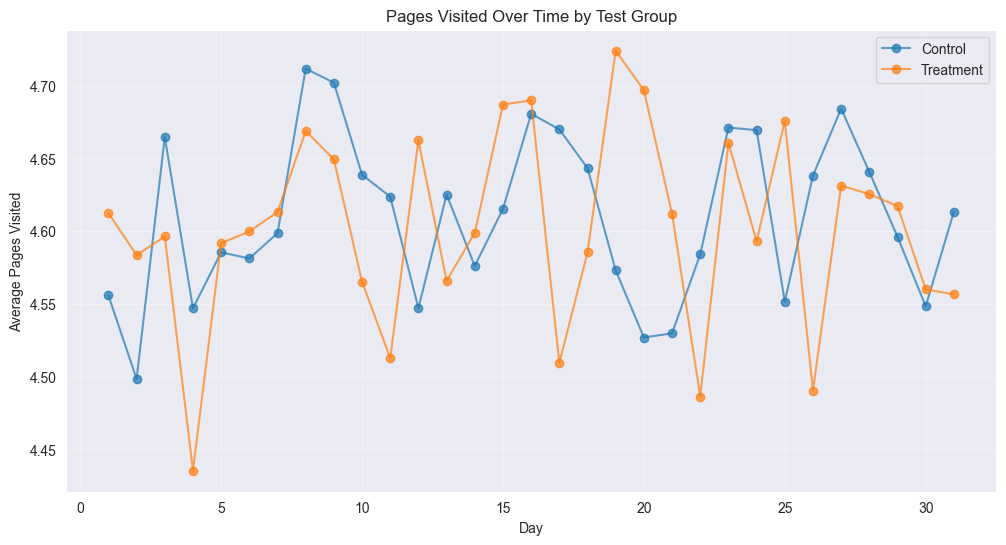

In [37]:
daily_avg = df.groupby(['day', 'test'])['pages_visited'].mean().reset_index()
plt.figure(figsize=(12, 6))
for test_group in [0, 1]:
    data = daily_avg[daily_avg['test'] == test_group]
    plt.plot(data['day'], data['pages_visited'],
             label=f'{"Control" if test_group == 0 else "Treatment"}',
             marker='o', alpha=0.7)
plt.xlabel('Day')
plt.ylabel('Average Pages Visited')
plt.title('Pages Visited Over Time by Test Group')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1000x600 with 0 Axes>

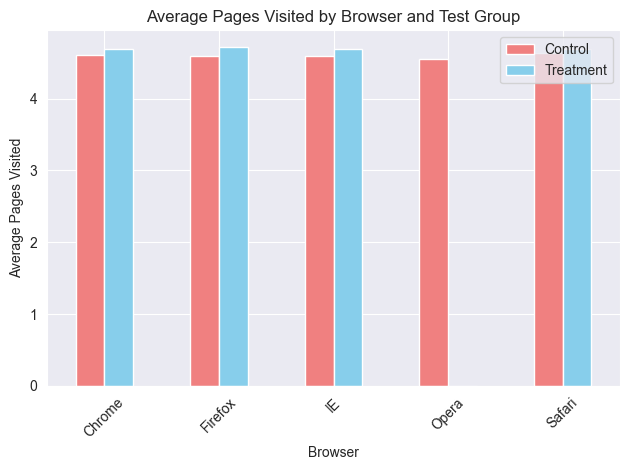

In [36]:
plt.figure(figsize=(10, 6))
browser_avg = df.groupby(['browser', 'test'])['pages_visited'].mean().reset_index()
browser_pivot = browser_avg.pivot(index='browser', columns='test', values='pages_visited')
browser_pivot.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Average Pages Visited by Browser and Test Group')
plt.ylabel('Average Pages Visited')
plt.xlabel('Browser')
plt.legend(['Control', 'Treatment'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

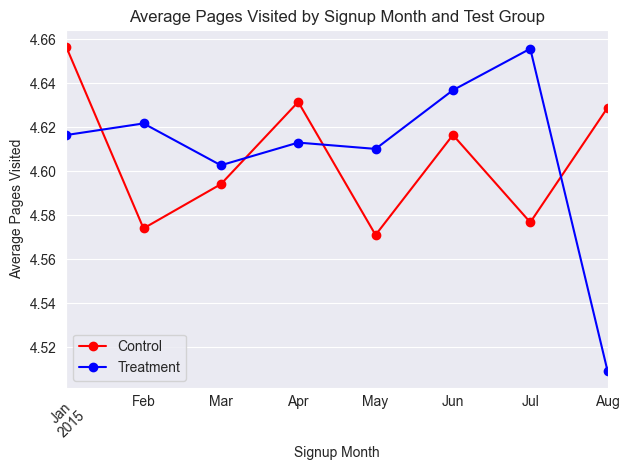

In [35]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['signup_month'] = df['signup_date'].dt.to_period('M')
plt.figure(figsize=(12, 6))
signup_avg = df.groupby(['signup_month', 'test'])['pages_visited'].mean().reset_index()
signup_pivot = signup_avg.pivot(index='signup_month', columns='test', values='pages_visited')
signup_pivot.plot(kind='line', marker='o', color=['red', 'blue'])
plt.title('Average Pages Visited by Signup Month and Test Group')
plt.ylabel('Average Pages Visited')
plt.xlabel('Signup Month')
plt.legend(['Control', 'Treatment'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Daily trends (first chart):
The two lines are all over the place and kind of bounce around each other some days the control group is a bit higher, other days the treatment group is there is no clear pattern that says this feature is actually working

#### Browser(second chart):
 Across different browsers :Chrome Firefox, Safari there is no difference the bars are almost the same height  so it doesn’t seem like the feature is having any effect depending on what browser people use but for opera its 0 for the treatment group

#### Signup timing (third chart):
 This one is interesting People who signed up in July actually did worse with the feature  which isn’t good  for the other months the results are all over the place with no clear trend or winner

### Third question:
If you identified segments that responded differently to the test, can you guess the
reason? Would this change your point 1 conclusions?

 The Opera browser issue is a red flag because seeing zero pages visited for those users shows there is something wrong with the data

In [38]:
print("Opera user analysis:")
print(df[df['browser'] == 'Opera']['pages_visited'].describe())
print(f"Total Opera users: {len(df[df['browser'] == 'Opera'])}")

Opera user analysis:
count    2127.000000
mean        2.370475
std         3.009554
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        13.000000
Name: pages_visited, dtype: float64
Total Opera users: 2127


In [39]:
for browser in df['browser'].unique():
    zero_pages = len(df[(df['browser'] == browser) & (df['pages_visited'] == 0)])
    total = len(df[df['browser'] == browser])
    print(f"{browser}: {zero_pages}/{total} users with 0 pages ({zero_pages/total*100:.1f}%)")

Chrome: 0/43427 users with 0 pages (0.0%)
Safari: 0/10808 users with 0 pages (0.0%)
Opera: 1018/2127 users with 0 pages (47.9%)
Firefox: 0/21758 users with 0 pages (0.0%)
IE: 0/21880 users with 0 pages (0.0%)


In [40]:
browser = df[df['browser'] != 'Opera']

In [41]:
control = browser[browser['test'] == 0]['pages_visited']
treatment = browser[browser['test'] == 1]['pages_visited']

In [42]:
t_stat, p_value = stats.ttest_ind(control, treatment)

In [43]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -5.479595897076519
P-value: 4.273456891094664e-08


## It might seem like the feature works better after we remove the Opera users but that doesn’t mean we can just roll it out to everyone The improvement could just be because we ignored the data problem and the same issue might still affect other users We should figure out what’s going wrong with the Opera data and make sure the feature really works before expanding it to more people